In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [14]:
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 10


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    "/content/dataset/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    "/content/dataset/val",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 3689 images belonging to 10 classes.
Found 927 images belonging to 10 classes.


In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(train_data.num_classes, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,922 (3.14 MB)

 Trainable params: 822,922 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 32s 259ms/step - accuracy: 0.5179 - loss: 1.4195 - val_accuracy: 0.7163 - val_loss: 0.6133
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 29s 249ms/step - accuracy: 0.7722 - loss: 0.5278 - val_accuracy: 0.7454 - val_loss: 0.5005
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 30s 255ms/step - accuracy: 0.7816 - loss: 0.4593 - val_accuracy: 0.8058 - val_loss: 0.4642
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 29s 247ms/step - accuracy: 0.8201 - loss: 0.3999 - val_accuracy: 0.7853 - val_loss: 0.4431
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 29s 247ms/step - accuracy: 0.8593 - loss: 0.3361 - val_accuracy: 0.7745 - val_loss: 0.4571
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 29s 246ms/step - accuracy: 0.8694 - loss: 0.3042 - val_accuracy: 0.7972 - val_loss: 0.4313
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 29s 246ms/step - accuracy: 0.8746 - loss: 0.2879 - val_accuracy: 0.7691 - val_loss: 0.4848
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 29s 246ms/step - accuracy: 0.8901 - loss: 0

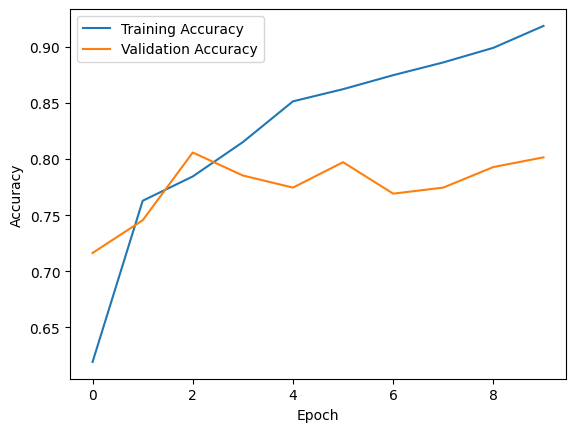

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


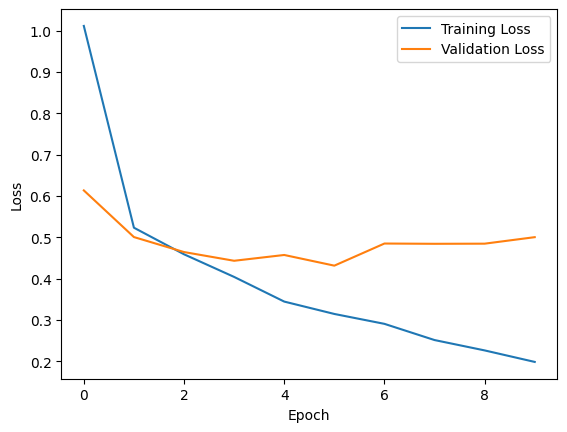

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
loss, acc = model.evaluate(val_data)
print("Validation Accuracy:", acc)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8172 - loss: 0.4565
Validation Accuracy: 0.8015102744102478


In [24]:
model.save("cnn_xray_model.h5")
